# Linear Regression - Energy Efficiency Dataset
This notebook will explore the dataset and use linear regression to explain the relationship between the independent variables and dependent variable (heating load) with random forest regressor to be used as a model for feature selection

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor as rf_reg
from sklearn.model_selection import RandomizedSearchCV as randomCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn import feature_selection
from sklearn.linear_model import LinearRegression as l_reg
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from plotnine import *
from matplotlib import gridspec
from sklearn.preprocessing import StandardScaler
import pprint

# Loading Data

In [2]:
df = pd.read_csv('../input/eergy-efficiency-dataset/ENB2012_data.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Adding column name for each column in the dataframe for clearer understanding and easier data slicing using pandas

In [3]:
df.columns=["relative_compactness","surface_area","wall_area","roof_area","overall_height","orientaion",
                   "glazing_area","glazing_area_dist","heating_load","cooling_load"]
df

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientaion,glazing_area,glazing_area_dist,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


# Exploring and Transforming Data
This section will explore data through summary table, histogram and correlation matrix to understand the data, explore the relationship between the variables and check whether the data contain any missing values.

In [4]:
df.describe()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientaion,glazing_area,glazing_area_dist,heating_load,cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


There are no missing values for each variable as the counts for each variable are the same. However, glazing area and glazing area distribution have values 0 for some instances.

In [5]:
df.loc[df["glazing_area"]==0].describe()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientaion,glazing_area,glazing_area_dist,heating_load,cooling_load
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0,48.0,48.000000,48.000000
mean,0.764167,671.708333,318.500000,176.604167,5.250000,3.500000,0.0,0.0,14.286458,19.706250
std,0.106827,88.960297,44.059438,45.614184,1.768519,1.129865,0.0,0.0,7.625241,8.134356
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.0,0.0,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.500000,2.750000,0.0,0.0,7.037500,12.047500
50%,0.750000,673.750000,318.500000,183.750000,5.250000,3.500000,0.0,0.0,13.200000,18.980000
75%,0.830000,741.125000,343.000000,220.500000,7.000000,4.250000,0.0,0.0,19.747500,25.860000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.0,0.0,29.900000,39.440000


In [6]:
df.loc[df["glazing_area_dist"]==0].describe()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientaion,glazing_area,glazing_area_dist,heating_load,cooling_load
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0,48.0,48.000000,48.000000
mean,0.764167,671.708333,318.500000,176.604167,5.250000,3.500000,0.0,0.0,14.286458,19.706250
std,0.106827,88.960297,44.059438,45.614184,1.768519,1.129865,0.0,0.0,7.625241,8.134356
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.0,0.0,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.500000,2.750000,0.0,0.0,7.037500,12.047500
50%,0.750000,673.750000,318.500000,183.750000,5.250000,3.500000,0.0,0.0,13.200000,18.980000
75%,0.830000,741.125000,343.000000,220.500000,7.000000,4.250000,0.0,0.0,19.747500,25.860000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.0,0.0,29.900000,39.440000


Based on the 2 summary tables above, when glazing area or glazing area distribution is 0, the other also contain value 0. So, if glazing area or glazing area distribution are valued at 0 for a building, it can be assumed that the building itself do not have glazing area.

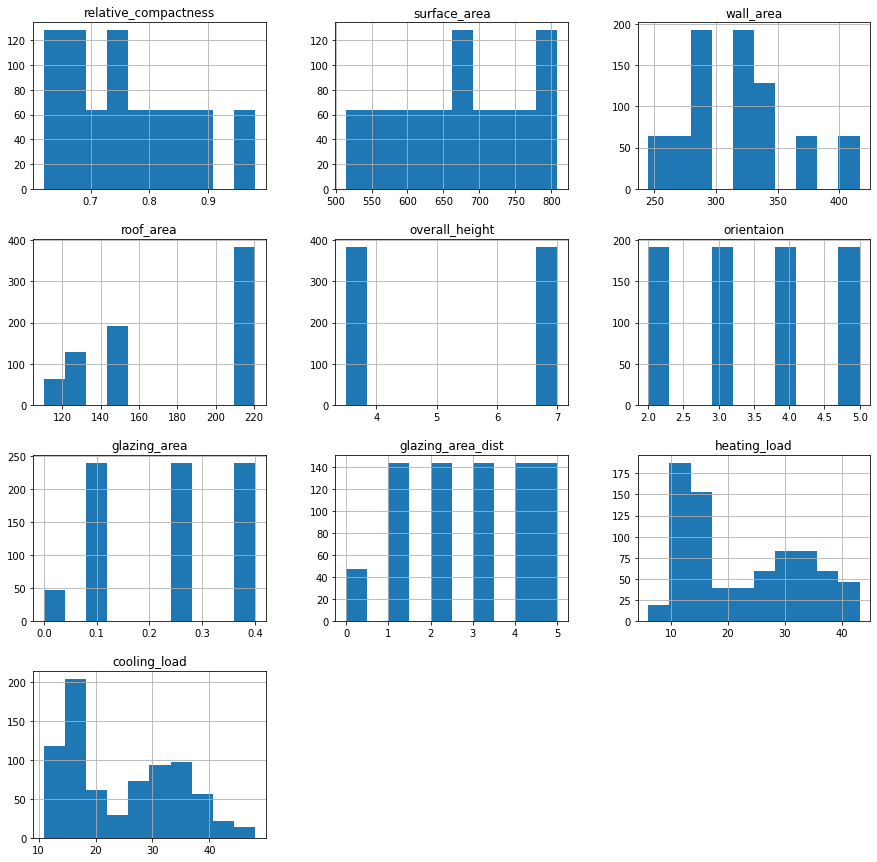

In [7]:
df.hist(figsize=(15,15))
plt.show()

Looking at heating load and cooling, they seem to be heavily skewed to the right. Therefore, log transformation will be done on heating load and cooling load to make them more normalised in term of distribution

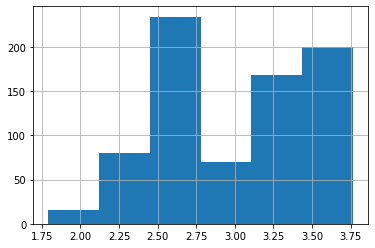

In [8]:
df["log_heating_load"]=np.log(df["heating_load"])
df["log_heating_load"].hist(bins=6)
plt.show()

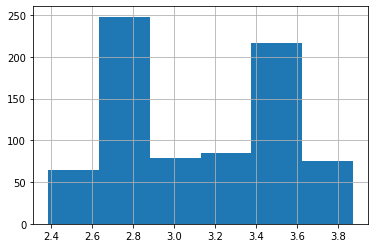

In [9]:
df["log_cooling_load"]=np.log(df["cooling_load"])
df["log_cooling_load"].hist(bins=6)
plt.show()

After log transformation on heating and cooling loads, both variables' distributions look better but both show bimodal distribution as two peaks are formed.

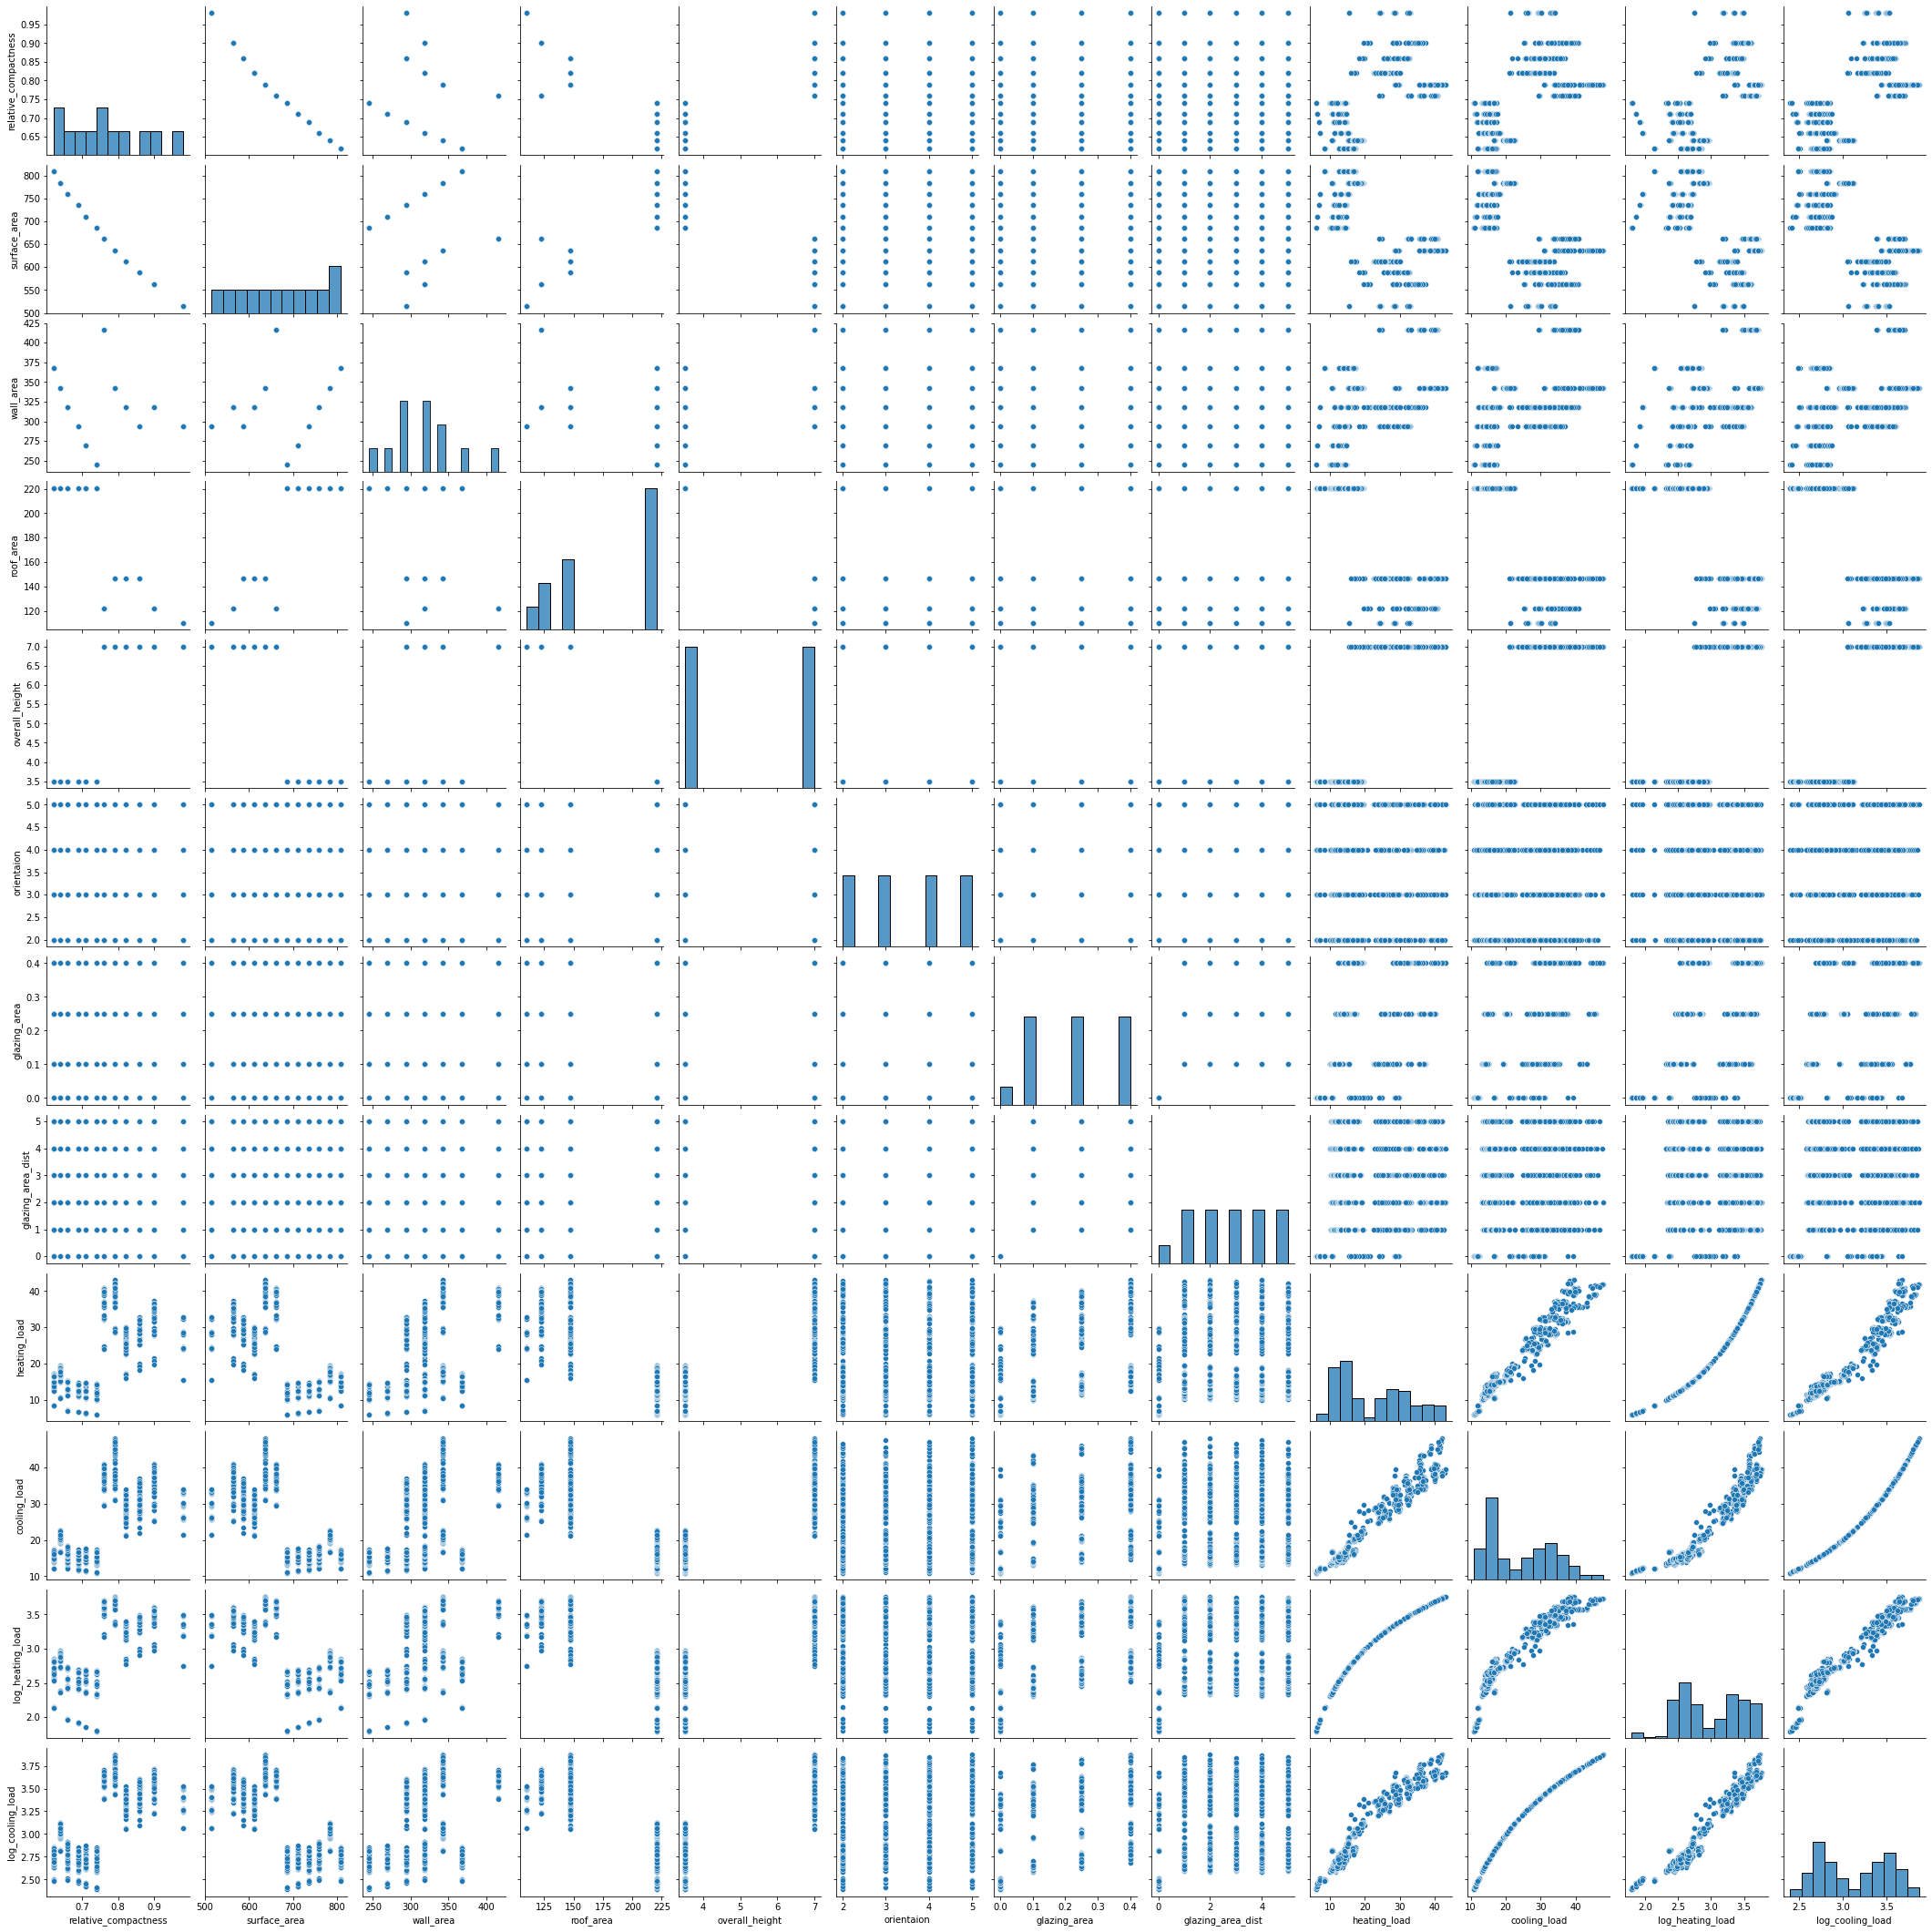

In [10]:
sns.pairplot(df)
plt.show()

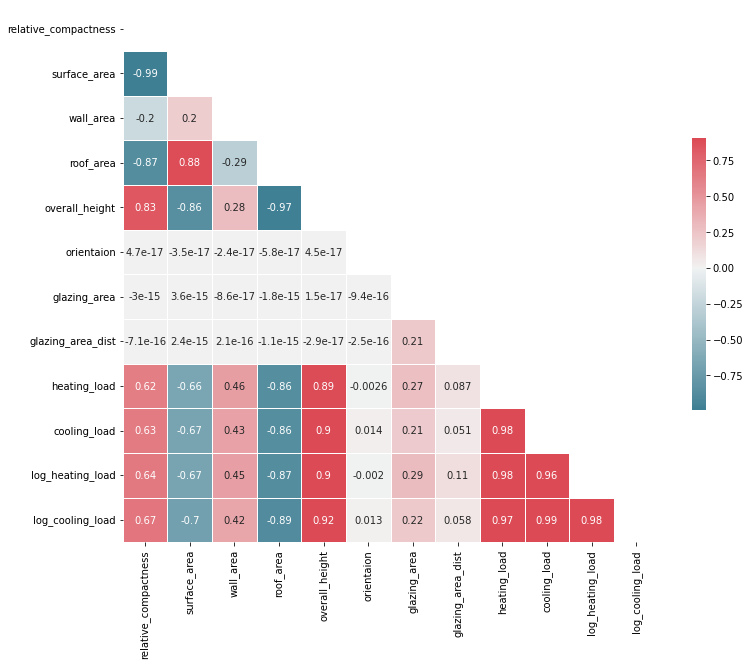

In [11]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask,cmap=cmap, vmax=.9, center=0, square=True, linewidths=.5, annot=True,cbar_kws={"shrink": .5})
plt.show()

relative compactness is highly correlated to surface area, roof area and overall height. Therefore, feature selection is required to reduce the number of features that are highly correlated.

heating load is highly correlated to cooling load which suggested that only 1 of them can be used as dependent factor to determine energy efficiency of the building. Therefore, log heating load is selected as dependent variable to determine energy efficiency in term of heating load.

# Using Raw Data (Log_heating_load)
Using the dataset above with log heating load as the main dependent variable, the data is split into train and test datasets with the ratio of 80:20. After splitting, feature selection and model fitting using linear regression will be done to test the performance of linear regression after feature selection.

In [12]:
df_f=df.copy()
df_f.drop(["heating_load","cooling_load"],axis=1,inplace=True)
#energy_df_f.drop(["log_heating_load","cooling_load"],axis=1,inplace=True)

energy_X=df_f.iloc[:,:-2]
energy_Y=df_f.loc[:,["log_heating_load"]]
#energy_Y=energy_df_f.loc[:,["heating_load"]]

train_X,test_X,train_Y,test_Y=\
train_test_split(energy_X,energy_Y,test_size=0.20,random_state=48)

print(train_X.shape)
print(test_X.shape)

(614, 8)
(154, 8)


Train dataset has 614 instances while test dataset has 154 instances with 8 variables including log heating load after dropping heating load and cooling load.

# Randomised Grid Search for Random Forest Regressor
This section will use the data with log heating load as the main dependent variable to do a randomised cross validation search for random forest regressor to tune the hyperparameters for random forest regressor. The random forest regressor is used as feature selection model as the model can calculate the weight importance for each variable based on the proportion of each variable is used in the model to partition the data in a way that the predicted value is closer to the actual value in dependent variable.

In [13]:
def rf_regr_cv_model(min_sample_split_in,min_sample_leaf_in,max_feature_in):
    rf_grid={"min_samples_split":min_sample_split_in,
             "min_samples_leaf":min_sample_leaf_in,"max_features":max_feature_in}
    regr = rf_reg(max_depth=3, random_state=48)
    rf_reg_cv = randomCV(regr, rf_grid, random_state=48,scoring='neg_root_mean_squared_error',cv=5)
    return rf_reg_cv

The function above is to create a randomised cross-validation search process using random forest regressor as base model to tune the hyperparameters in the model. The hyperparameters to be tuned are minimum sample split, minimum sample size in the leaf and maximum features to be used in each regression tree. The model is regularised with maximum depth of 3 and using seed number 48 to prevent overfitting. Root mean squared error (RMSE) is used as the scoring criteria to determine the best set of hyperparameters.

In [14]:
min_sample_split=np.arange(10,35,5)
min_sample_leaf=np.arange(10,35,5)
max_feature=np.arange(3,7,1)

rf_reg_search=rf_regr_cv_model(min_sample_split_in=min_sample_split,min_sample_leaf_in=min_sample_leaf,
                            max_feature_in=max_feature)

In [15]:
rf_reg_search.fit(train_X,np.ravel(train_Y))

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=3,
                                                   random_state=48),
                   param_distributions={'max_features': array([3, 4, 5, 6]),
                                        'min_samples_leaf': array([10, 15, 20, 25, 30]),
                                        'min_samples_split': array([10, 15, 20, 25, 30])},
                   random_state=48, scoring='neg_root_mean_squared_error')

Using the rf_regr_cv_model and the hyperparameters declared, train dataset will be fitted into the model to determine the best set of hyperparameters for the model.

In [16]:
print("Best parameters set:",rf_reg_search.best_params_)
print("Best score:",rf_reg_search.best_score_)

Best parameters set: {'min_samples_split': 30, 'min_samples_leaf': 10, 'max_features': 6}
Best score: -0.10621893329491365


Based on the randomised CV search result above, the model performs the best when:

the sample split at 30
each leaf has 10 instances
6 features are used
The model is refitted with the best set of hyperparameters found in randomised CV search.

In [17]:
regr_rf_best=rf_reg(min_samples_split= 30, min_samples_leaf=10, max_features=6,max_depth=3,random_state=48)
regr_rf_best.fit(train_X,np.ravel(train_Y))

RandomForestRegressor(max_depth=3, max_features=6, min_samples_leaf=10,
                      min_samples_split=30, random_state=48)

In [18]:
predicted_train_Y=regr_rf_best.predict(train_X)
predicted_test_Y=regr_rf_best.predict(test_X)
print("RMSE for Train set:",MSE(predicted_train_Y,train_Y,squared=False))
print("RMSE for Test set:",MSE(predicted_test_Y,test_Y,squared=False))

RMSE for Train set: 0.10478360031727474
RMSE for Test set: 0.12093258312389647


Looking at the model performance in term of RMSE, the model seems to be overfitting as RMSE in test is higher than in train. But, the difference is quite small, around 0.02.

# Feature Selection
This section will conduct feature selection using weight importance calculated from the random forest regressor to select the features to be used in linear regression

In [19]:
feature_list=list(train_X.columns)
feature_impt=list(regr_rf_best.feature_importances_)
feature_impt_dict=dict(zip(feature_list,feature_impt))
feature_impt_dict=dict(sorted(feature_impt_dict.items(), key=lambda item: item[1],reverse=True))
feature_impt_dict

{'relative_compactness': 0.3191662145925261,
 'surface_area': 0.22336464630553807,
 'overall_height': 0.21614737555010996,
 'roof_area': 0.15458824125022574,
 'glazing_area': 0.05391614794811664,
 'glazing_area_dist': 0.01661738547918015,
 'wall_area': 0.016199988874303354,
 'orientaion': 0.0}

Looking at the list above, relative compactness, surface area, overall height, roof area and glazing area are the top 5 features. However, there are 2 pairs of variables that are high correlated:

relative compactness with surface area
roof area with surface area
overall height with roof area
relative compactness with overall height

In [20]:
final_feature_list=["relative_compactness","overall_height","glazing_area","wall_area","roof_area","surface_area"]

A feature list is created with the roof area and surface area as the last 2 features as linear regression will be done using forward selection by adding variables one by one according to the feature list and selecting the smallest RMSE and biggest r2.

# Forward Selection Linear Regression
This section will conduct linear regression model fitting using forward selection by adding variables one by one into the model. The best model will be the one with the biggest negative RMSE and biggest r2.

In [21]:
def l_reg_cv(train_X,train_Y,feature_list):
    rmse_list_train=[]
    rmse_list_test=[]
    r2_list_train=[]
    r2_list_test=[]
    for i in range(1,len(feature_list)+1):
        train_X_temp=train_X.loc[:,feature_list[:i]]
        cv_results_temp = cross_validate(l_reg(), train_X.loc[:,final_feature_list[:i]],train_Y, 
                            cv=5,scoring=["neg_root_mean_squared_error","r2"],return_train_score=True)
        mean_rmse_train=np.mean(cv_results_temp["train_neg_root_mean_squared_error"])
        mean_r2_train=np.mean(cv_results_temp["train_r2"])
        mean_rmse_test=np.mean(cv_results_temp["test_neg_root_mean_squared_error"])
        mean_r2_test=np.mean(cv_results_temp["test_r2"])
        rmse_list_train.append(mean_rmse_train)
        r2_list_train.append(mean_r2_train)
        rmse_list_test.append(mean_rmse_test)
        r2_list_test.append(mean_r2_test)
        rmse_df=pd.DataFrame(zip(rmse_list_train,rmse_list_test,r2_list_train,r2_list_test))
        rmse_df.columns=["Mean RMSE Train","Mean RMSE Test","Mean R2 Train","Mean R2 Test"]
        rmse_df.index=rmse_df.index+1
    return rmse_df

The function above is to do a linear regression model fitting based on the feature list. The data with independent variables (train_X) will be sliced according to the variables in the feature list and fit into the model with dependent variable. Then, RMSE and R2 will be calculated for each set of independent variables fitted into the model to find out which set of independent variables is the most optimal to fit into the model.

In [22]:
rmse_cv=l_reg_cv(train_X,np.ravel(train_Y),final_feature_list)
rmse_cv

,Mean RMSE Train,Mean RMSE Test,Mean R2 Train,Mean R2 Test
1,-0.362498,-0.362583,0.423217,0.417459
2,-0.190841,-0.191884,0.840152,0.837311
3,-0.130170,-0.130528,0.925626,0.924653
4,-0.119656,-0.119957,0.937152,0.936287
5,-0.119151,-0.119537,0.937681,0.936732
6,-0.119162,-0.119560,0.937669,0.936707


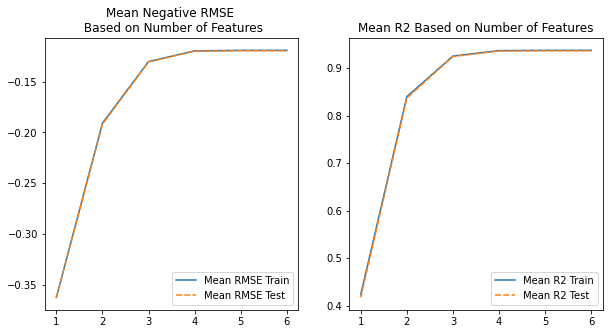

In [23]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.lineplot(data=rmse_cv.iloc[:,:2],ax=ax[0])
sns.lineplot(data=rmse_cv.iloc[:,2:],ax=ax[1])
ax[0].set_title("Mean Negative RMSE \n Based on Number of Features")
ax[1].set_title("Mean R2 Based on Number of Features")
plt.show()

Looking at the graphs and the table above, linear regression with 5 features seems to be better as it has higher negative mean RMSE and higher mean R2 in test set compared to others. Furthermore, means for negative RMSE and R2 in test slightly decreased when using 6 features.

Therefore,the most optimal number of features to be used in linear regression is 5 and the selected 5 features are relative_compactness, overall_height, glazing_area, wall_area and roof_area.

# Best Fit Linear Regression Model
This section will be refitted the linear regression model using the top 5 features in the previous section.

In [24]:
l_reg_best=l_reg()
l_reg_best.fit(train_X.loc[:,final_feature_list[:5]],np.ravel(train_Y))
pred_train_Y_best=l_reg_best.predict(train_X.loc[:,final_feature_list[:5]])
pred_test_Y_best=l_reg_best.predict(test_X.loc[:,final_feature_list[:5]])

In [25]:
print("RMSE for Train set:",MSE(pred_train_Y_best,train_Y,squared=False))
print("RMSE for Test set:",MSE(pred_test_Y_best,test_Y,squared=False))

RMSE for Train set: 0.11922889467600059
RMSE for Test set: 0.1337648622733699


The difference between test and train in RMSE is at least 0.01 which is quite small.

In [26]:
print("R2 for Train set:",r2_score(pred_train_Y_best,train_Y))
print("R2 for Test set:",r2_score(pred_test_Y_best,test_Y))

R2 for Train set: 0.9334914255748181
R2 for Test set: 0.9103904558887722


The difference between test and train is at least 0.02 which is quite small.

Therefore, the current model should be sufficient to predict the energy efficiency of a building in term of log heating load as the model can explain 90% of the variation in the data according to R2 and has small RMSE.

In [27]:
dict(zip(final_feature_list[:5],np.exp(l_reg_best.coef_)))

{'relative_compactness': 2.431700545461397,
 'overall_height': 1.302743163262805,
 'glazing_area': 2.859321841326749,
 'wall_area': 1.003359163787675,
 'roof_area': 1.0035293778011594}

Based on the coefficients above:

Heating load will be increased by a multiplicative factor of 2.43 when relative compactness increases by 1.
Heating load will be increased by a multiplicative factor of 1.30 when overall height increases by 1.
Heating load will be increased by a multiplicative factor of 2.86 when glazing area increases by 1.
Wall area and roof area affect the heating load but lesser magnitude compared to the previous 3 factors.
# Model Diagnostics
This section will look at the prediction performance of the model by plotting scatter plot for comparison between actual and predicted values, histogram for prediction errors and residual plot.

In [28]:
def predictVSactual(actual_y,y_predict,title_label):
    fig,ax=plt.subplots(1,len(actual_y),figsize=(15,15))
    for i,col in enumerate(actual_y,0):
        ax[i].plot(np.ravel(actual_y[i]),
                   np.ravel(y_predict[i]),'o',markeredgecolor="black")
        ax[i].set_title(title_label[i])
        ax[i].set_xlabel('Actual Values')
        ax[i].set_ylabel('Predicted Values')
        ax[i].set(aspect='equal')
        x=ax[i].get_xlim()
        y=ax[i].get_xlim()
        ax[i].plot(x,y, ls="--", c=".3")
    return fig,ax

The function above is to plot two scatter plots side by side with train on the left and test on the right using actual values and predicted values that store in list as inputs.

In [29]:
actual_y_energy=[train_Y,test_Y]
pred_y_energy=[pred_train_Y_best,pred_test_Y_best]

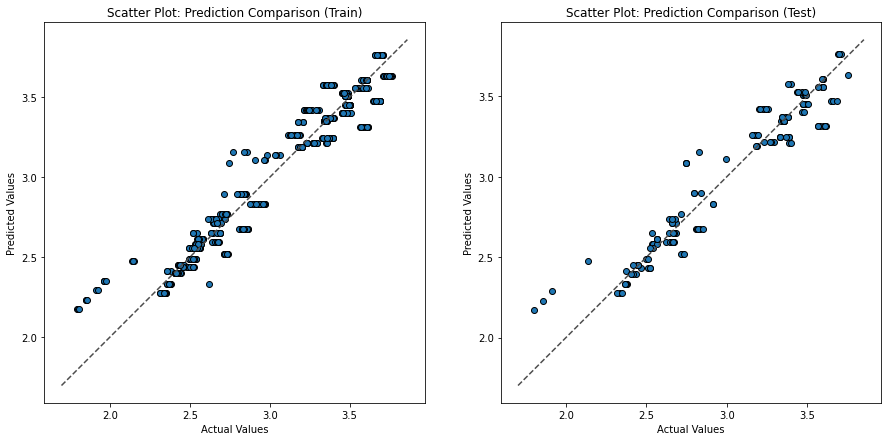

In [30]:
predictVSactual(actual_y_energy,pred_y_energy,
                ["Scatter Plot: Prediction Comparison (Train)","Scatter Plot: Prediction Comparison (Test)"])
plt.show()

Looking at the scatter plot, the model seems to be underestimated the heating load as more points situated at the right side of the diagonal line.

In [31]:
def residual_plot(actual_y,predict_y,title_label):
    fig,ax=plt.subplots(1,len(actual_y),figsize=(10,5))
    for i,col in enumerate(actual_y,0):
        sns.residplot(x=actual_y[i], y=predict_y[i], lowess=True, color="g",ax=ax[i])
        ax[i].set_title(title_label[i])
    return fig,ax

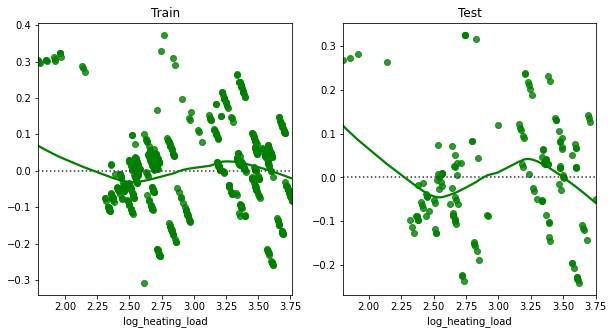

In [32]:
residual_plot(actual_y_energy,pred_y_energy,["Train","Test"])
plt.show()

Looking at the residual plots, they indicated that the residuals are in the range of -0.35 to 0.4. There are some outliers in train and test datasets as there are some instances with residuals greater than 0.3 or lesser than -0.3. The residual plots do not show any particular trends in the residuals.

In [33]:
raw_pred_err_list=[]

for i in range(0,len(actual_y_energy)):
    list_temp=[]
    list_temp=actual_y_energy[i].to_numpy().ravel()-pred_y_energy[i]
    raw_pred_err_list.append(list_temp)
raw_pred_err_label=["Raw Prediction Errors (Train)","Raw Prediction Errors (Test)"]

In [34]:
def raw_predict_err_hist(err_predict_list,bin_no,title_label):
    fig,ax=plt.subplots(1,len(err_predict_list),figsize=(10,5))
    for i,col in enumerate(err_predict_list,0):
        sns.histplot(x=err_predict_list[i],bins=bin_no,kde=True,ax=ax[i])
        ax[i].set_title(title_label[i])
    return fig,ax

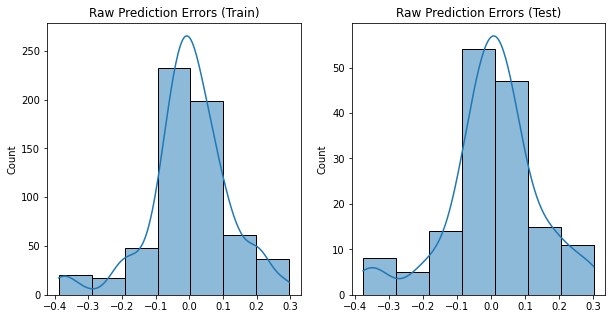

In [35]:
raw_predict_err_hist(raw_pred_err_list,bin_no=7,title_label=raw_pred_err_label)
plt.show()

Looking at the histogram above, the residuals are normally distributed with long left tails. Most prediction errors are in the range of -0.1 to 0.1.

# Using Raw Data (Log_cooling_load)
For this section, cooling load is used to find out the relationships for the same features with cooling load

In [36]:
energy2_X=df_f.iloc[:,:-2]
energy2_Y=df_f.loc[:,["log_cooling_load"]]
#energy_Y=energy_df_f.loc[:,["heating_load"]]

energy2_train_X,energy2_test_X,energy2_train_Y,energy2_test_Y=\
train_test_split(energy2_X,energy2_Y,test_size=0.20,random_state=48)

In [37]:
rmse_cv2=l_reg_cv(energy2_train_X,np.ravel(energy2_train_Y),final_feature_list)
rmse_cv2

,Mean RMSE Train,Mean RMSE Test,Mean R2 Train,Mean R2 Test
1,-0.290515,-0.290509,0.451712,0.447037
2,-0.139979,-0.140843,0.872678,0.869640
3,-0.112064,-0.112501,0.918384,0.916640
4,-0.109113,-0.109899,0.922627,0.920478
5,-0.108934,-0.109792,0.922880,0.920627
6,-0.108990,-0.109831,0.922802,0.920567


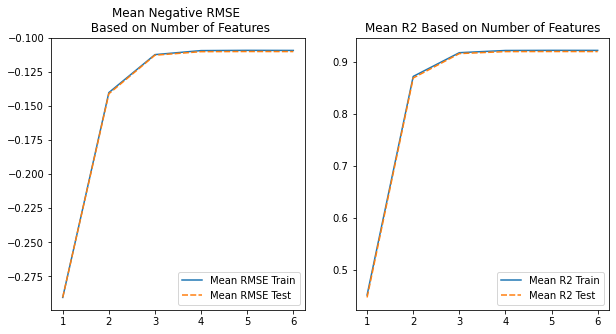

In [38]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.lineplot(data=rmse_cv2.iloc[:,:2],ax=ax[0])
sns.lineplot(data=rmse_cv2.iloc[:,2:],ax=ax[1])
ax[0].set_title("Mean Negative RMSE \n Based on Number of Features")
ax[1].set_title("Mean R2 Based on Number of Features")
plt.show()

Looking at the table and graphs above, the appropriate number of features are 5 as using 6 features do not show any great improvement on RMSE and R2 for both train and test datasets.

In [39]:
l_reg2_best=l_reg()
l_reg2_best.fit(energy2_train_X.loc[:,final_feature_list[:5]],np.ravel(energy2_train_Y))
pred2_train_Y_best=l_reg2_best.predict(energy2_train_X.loc[:,final_feature_list[:5]])
pred2_test_Y_best=l_reg2_best.predict(energy2_test_X.loc[:,final_feature_list[:5]])

The difference between test and train in RMSE is at least 0.01.

In [40]:
print("R2 for Train set:",r2_score(pred2_train_Y_best,energy2_train_Y))
print("R2 for Test set:",r2_score(pred2_test_Y_best,energy2_test_Y))

R2 for Train set: 0.9162985276981358
R2 for Test set: 0.8895421903026534


R2 for test is lower when using log cooling load as dependent variable instead of log heating load.
# Model Diagnostics

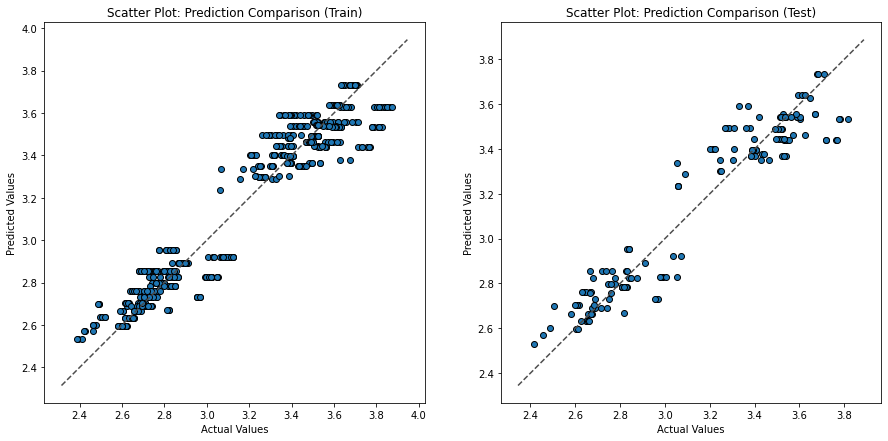

In [41]:
actual2_y_energy=[energy2_train_Y,energy2_test_Y]
pred2_y_energy=[pred2_train_Y_best,pred2_test_Y_best]

predictVSactual(actual2_y_energy,pred2_y_energy,
                ["Scatter Plot: Prediction Comparison (Train)","Scatter Plot: Prediction Comparison (Test)"])
plt.show()

Similar to using log heating load as dependent variable, the model seems to be underestimated the cooling load as most points are at the right side of the diagonal line.

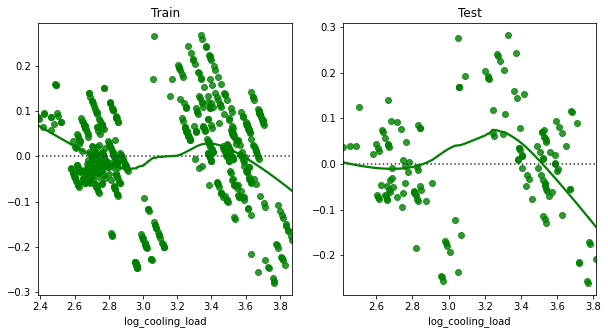

In [42]:
residual_plot(actual2_y_energy,pred2_y_energy,["Train","Test"])
plt.show()

The range of the residuals is between -0.3 to 0.3. The residual plots do not show any particular trends in the residuals.

In [43]:
raw_pred2_err_list=[]

for i in range(0,len(actual2_y_energy)):
    list_temp=[]
    list_temp=actual2_y_energy[i].to_numpy().ravel()-pred2_y_energy[i]
    raw_pred2_err_list.append(list_temp)
raw_pred2_err_label=["Raw Prediction Errors (Train)","Raw Prediction Errors (Test)"]

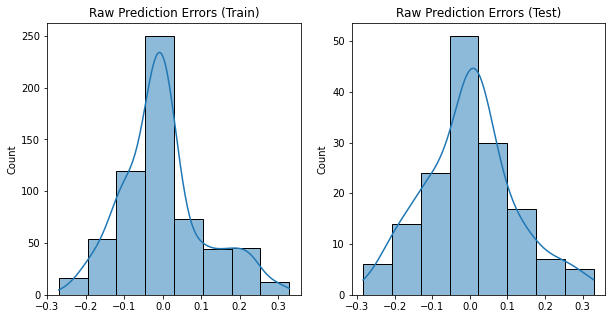

In [44]:
raw_predict_err_hist(raw_pred2_err_list,bin_no=8,title_label=raw_pred2_err_label)
plt.show()

Looking at the histograms above, the residuals are approximately normally distributed. The prediction errors seem to be larger using log cooling load compared to log heating load.

# Interpretation on Regression Coefficients

In [45]:
print("Log heating load as dependent variable:")
dict(zip(final_feature_list[:5],np.exp(l_reg_best.coef_)))

Log heating load as dependent variable:


{'relative_compactness': 2.431700545461397,
 'overall_height': 1.302743163262805,
 'glazing_area': 2.859321841326749,
 'wall_area': 1.003359163787675,
 'roof_area': 1.0035293778011594}

Based on the coefficients above:

Heating load will be increased by a multiplicative factor of 2.43 when relative compactness increases by 1.
Heating load will be increased by a multiplicative factor of 1.30 when overall height increases by 1.
Heating load will be increased by a multiplicative factor of 2.86 when glazing area increases by 1.
Wall area and roof area do affect the heating load but lesser magnitude compared to the previous 3 factors.
Therefore, lower building with low relative compactness and small glazing area requires less energy to warm up the indoor environment. Smaller wall area and roof area also reduce energy required to warm up the indoor environment.

In [46]:
print("Log cooling load as dependent variable:")
dict(zip(final_feature_list[:5],np.exp(l_reg2_best.coef_)))

Log cooling load as dependent variable:


{'relative_compactness': 0.3605651195502049,
 'overall_height': 1.2268816021400986,
 'glazing_area': 1.8836414031727944,
 'wall_area': 1.0003572047990494,
 'roof_area': 0.9980394802297674}

Based on the coefficients above:

Cooling load will be reduced by a multiplicative factor of 0.36 when relative compactness increases by 1.
Cooling load will be increased by a multiplicative factor of 1.23 when overall height increases by 1.
Cooling load will be increased by a multiplicative factor of 1.88 when glazing area increases by 1.
Wall area and roof area do affect the cooling load but lesser magnitude compared to the previous 3 factors.
Therefore, lower building with high relative compactness and small glazing area requires less energy to cool down the indoor environment. Smaller wall area and bigger roof area also reduce energy required to cool down the indoor environment.